In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob, os, random

In [ ]:
#prepare the data and generate the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2,
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/content/drive/MyDrive/Garbage classification/Garbage classification",
                                           target_size = (224, 224), batch_size = 64, class_mode="categorical")

Found 2537 images belonging to 6 classes.


In [ ]:
#use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)


In [ ]:
#now let's add output layers or prediction layer

prediction = layers.Dense(units = 6, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])
result = model.fit_generator(train_data, epochs = 20, steps_per_epoch=len(train_data))

<ipython-input-12-ca4427d86634>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(train_data, epochs = 20, steps_per_epoch=len(train_data))


Epoch 1/20
40/40 [==============================] - 1696s 42s/step - loss: 1.7070 - accuracy: 0.3563
Epoch 2/20
40/40 [==============================] - 46s 1s/step - loss: 1.2576 - accuracy: 0.5034
Epoch 3/20
40/40 [==============================] - 45s 1s/step - loss: 1.1992 - accuracy: 0.5333
Epoch 4/20
40/40 [==============================] - 46s 1s/step - loss: 1.1320 - accuracy: 0.5759
Epoch 5/20
40/40 [==============================] - 46s 1s/step - loss: 1.0516 - accuracy: 0.6027
Epoch 6/20
40/40 [==============================] - 47s 1s/step - loss: 1.0153 - accuracy: 0.6200
Epoch 7/20
40/40 [==============================] - 46s 1s/step - loss: 0.9711 - accuracy: 0.6378
Epoch 8/20
40/40 [==============================] - 47s 1s/step - loss: 0.9326 - accuracy: 0.6523
Epoch 9/20
40/40 [==============================] - 46s 1s/step - loss: 0.8934 - accuracy: 0.6657
Epoch 10/20
40/40 [==============================] - 46s 1s/step - loss: 0.9055 - accuracy: 0.6642
Epoch 11/20
40/4

In [ ]:
from tensorflow.keras.preprocessing import image
output_class = ["cardboard","glass","metal","paper","plastic","trash"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()

  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

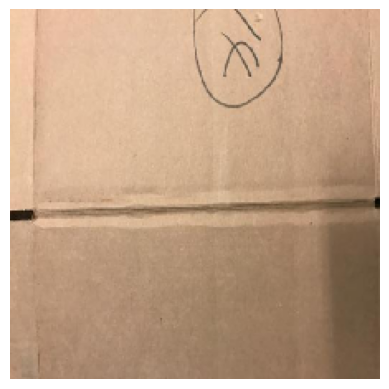

1/1 [==============================] - 1s 1s/step
Your waste material is  cardboard  with  99.23  % accuracy


In [ ]:
waste_prediction("/content/drive/MyDrive/Garbage classification/Garbage classification/cardboard/cardboard1.jpg")

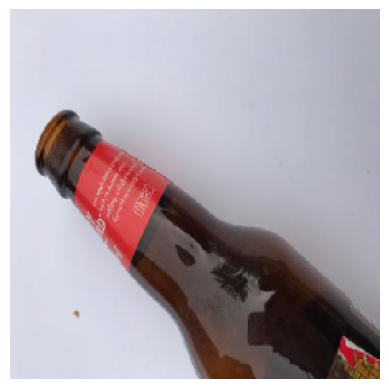

1/1 [==============================] - 0s 27ms/step
Your waste material is  glass  with  99.94  % accuracy


In [ ]:
waste_prediction("/content/drive/MyDrive/Garbage classification/Garbage classification/glass/glass19.jpg")

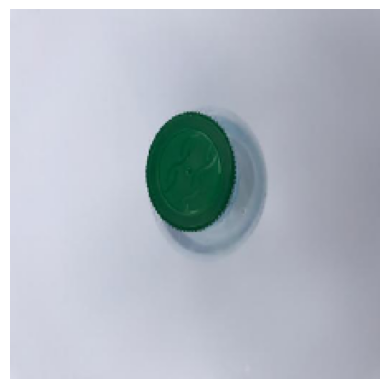

1/1 [==============================] - 0s 28ms/step
Your waste material is  plastic  with  99.77  % accuracy


In [ ]:
waste_prediction("/content/drive/MyDrive/Garbage classification/Garbage classification/plastic/plastic26.jpg")

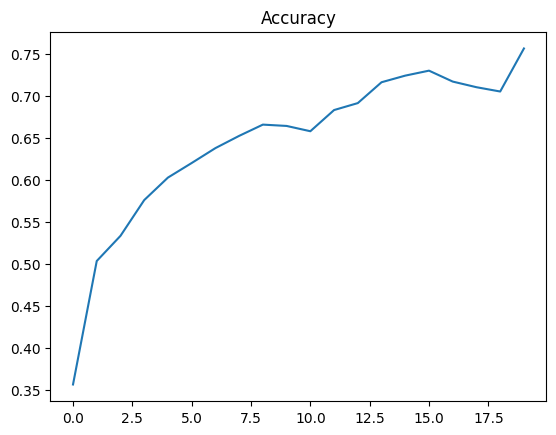

In [ ]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

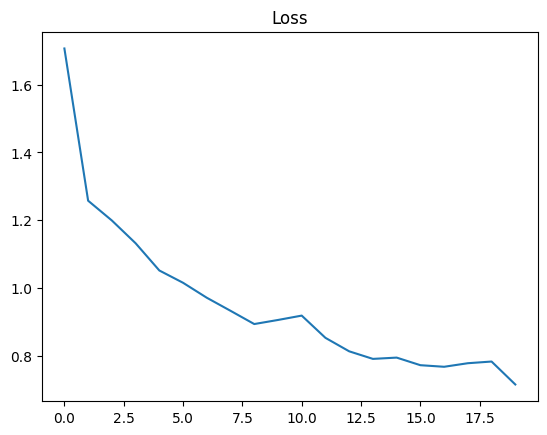

In [ ]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()


In [ ]:
import pickle
# Save the model
with open('waste_classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
a=1+2
print(a)

3


In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


THIS IS TESTING PART AND RECYCLE